# (Ford GoBike System Data)
## by (Hajar Hesham)

## Preliminary Wrangling

> This data contain the rides of bike in a bike-sharing system in an Francisco Bay area.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### load the Dataset

In [ ]:
#load the data
dfr = pd.read_csv('201902-fordgobike-tripdata.csv')
dfr.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
dfr.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [ ]:
#get the shape of the data
dfr.shape

(183412, 16)

In [ ]:
#get info about nulls and data types
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [ ]:
#get data statistics
dfr.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Cleaning


>- drop null values
>- Add [Age] column from the member_birth_year column then i droped it.
>- convert the data type from  object to date time then convert it to three columns [month] , [day] and [Hour].
*   drop unused columns



In [ ]:
#copy the dataset
df=dfr.copy()
# for i in range(183412):
df['Age'] = 2022 - df['member_birth_year']
df['Age']

0         38.0
1          NaN
2         50.0
3         33.0
4         48.0
          ... 
183407    26.0
183408    38.0
183409    32.0
183410    34.0
183411    33.0
Name: Age, Length: 183412, dtype: float64

In [ ]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,33.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,48.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,63.0
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,39.0
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,33.0
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,34.0
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,30.0


In [ ]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [ ]:
df.drop(columns=['start_station_latitude','start_station_longitude','end_station_longitude'],inplace = True)

In [ ]:
df['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [ ]:
df['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
21st Ave at International Blvd                                  6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [ ]:
df.isna().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
end_station_latitude       0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
Age                        0
dtype: int64

In [ ]:
df['Age'].unique()            #outliers

array([ 38.,  50.,  33.,  48.,  63.,  39.,  34.,  30.,  26.,  29.,  32.,
        41.,  47.,  44.,  31.,  25.,  36.,  22.,  40.,  27.,  42.,  49.,
        37.,  51.,  43.,  55.,  24.,  28.,  45.,  23.,  35.,  53.,  59.,
        46.,  58.,  57.,  61.,  54.,  56.,  60.,  68.,  64.,  62.,  52.,
        66.,  65.,  77., 122.,  70.,  74.,  71.,  81.,  72.,  73.,  69.,
        67.,  76.,  75.,  91.,  79.,  80., 102.,  89.,  21., 144., 121.,
        78.,  94.,  88.,  83.,  92., 120., 112.,  84.,  95.])

In [ ]:
df.duplicated().sum()          #no duplications

0

In [ ]:
#drop the member_birth year column
df.drop(columns=['member_birth_year'],inplace = True)

In [ ]:
#start time 
#end time 
#convert the data type from  object to date time
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_time'] = pd.to_datetime(df['start_time'])

#Return Indexes formatted strings specified by date_format (day , month , hour)
#df['trip_month'] = df.start_time.dt.strftime('%b')


In [ ]:
df['trip_month'] = df['start_time'].dt.month
df['trip_day'] = df['start_time'].dt.day_name()
df['start_trip_hour'] = df['start_time'].dt.hour
df['duration_hour'] = df['duration_sec']/3600

In [ ]:
df['start_trip_hour']

0         17
2         12
3         17
4         23
5         23
          ..
183407     0
183408     0
183409     0
183410     0
183411     0
Name: start_trip_hour, Length: 174952, dtype: int64

In [ ]:
df['duration_hour']

0         14.495833
2         17.181667
3         10.136111
4          0.440278
5          0.498056
            ...    
183407     0.133333
183408     0.086944
183409     0.039167
183410     0.038611
183411     0.075278
Name: duration_hour, Length: 174952, dtype: float64

In [ ]:
#convert the Age and trip_hour data type to int
df.Age = df.Age.astype('int64') 
df.start_trip_hour = df.start_trip_hour.astype('int64') 

In [ ]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
bike_id                             int64
user_type                          object
member_gender                      object
bike_share_for_all_trip            object
Age                                 int64
trip_month                          int64
trip_day                           object
start_trip_hour                     int64
duration_hour                     float64
dtype: object

### What is the structure of your dataset?

> rows = 183412 <br>
  features = 16

### What is/are the main feature(s) of interest in your dataset?

> ***The main feture is :***


*   gender
*   age
*   user_type
*   trip_hour
*   trip_day



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - the start time and the end time =>use it to find month, day, and hours

## Univariate Exploration
> 

In [ ]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'bike_id', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'Age', 'trip_month', 'trip_day',
       'start_trip_hour', 'duration_hour'],
      dtype='object')

**gender**</b>

**My observation**

*   Most of the users of Ford GoBike System  are male

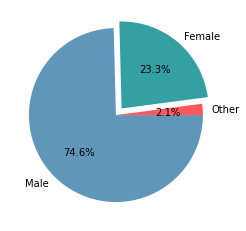

In [ ]:
colors = ['#6096ba', '#34a0a4', '#ff595e']
explode = (0, 0.1, 0)   
gender_counts = df['member_gender'].value_counts()
plt.pie(gender_counts,labels=gender_counts.index,counterclock = False,colors =colors,explode=explode, autopct='%1.1f%%')
plt.show()

**gender**</b>

**My observation**

*   Most of the users of Ford GoBike System are Subscriber

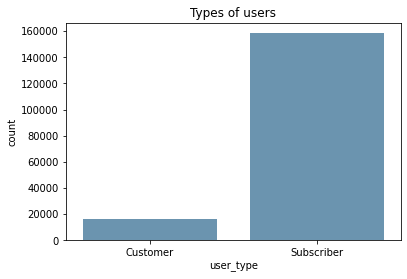

In [ ]:
sb.countplot(data=df,x='user_type',palette=['#6096ba'])
plt.title('Types of users')
plt.show()

**Age**</b>

**My observation**

*   the mean Age is 37 
*  affected by outliers




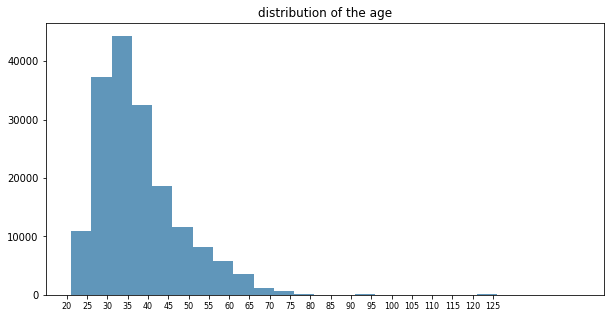

In [ ]:
plt.figure(figsize=(10,5))
plt.title('distribution of the age')
bins = np.arange(df['Age'].min(),df['Age'].max()+4,5)
plt.hist(data =df,x ='Age',bins=bins,color=['#6096ba']);
plt.xticks(np.arange(20,130,5),size=8)
plt.show()

after removing the outliers


In [ ]:
df = df.query('Age <80')

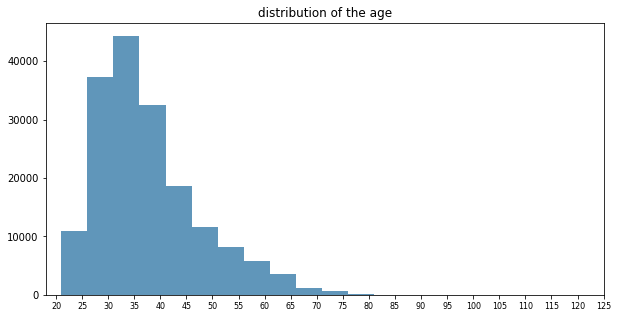

In [ ]:
plt.figure(figsize=(10,5))
plt.title('distribution of the age')
bins = np.arange(df['Age'].min(),df['Age'].max()+4,5)
plt.hist(data =df,x ='Age',bins=bins,color=['#6096ba']);
plt.xticks(np.arange(20,130,5),size=8)
plt.show()

**Trip distribution over week**</b>

**My observation**

*   Most rides are at the end of the week(Thursday-Tuesday)

* Fewer rides are at the beginning of  the week(Saturday-Sunday)


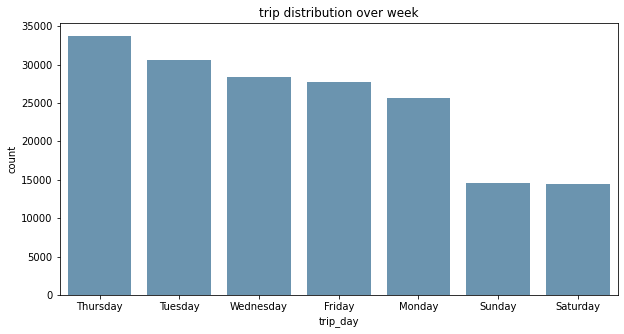

In [ ]:
plt.figure(figsize=(10,5))
plt.title('trip distribution over week')
color = sb.color_palette()[0]
sb.countplot(data=df,x='trip_day',palette=['#6096ba'],order=df['trip_day'].value_counts().index)
plt.show()

**Hours**</b>

**My observation**

*   The most rides are at 8 am and 17 pm.

*   The less rides are at 3 am and 4am



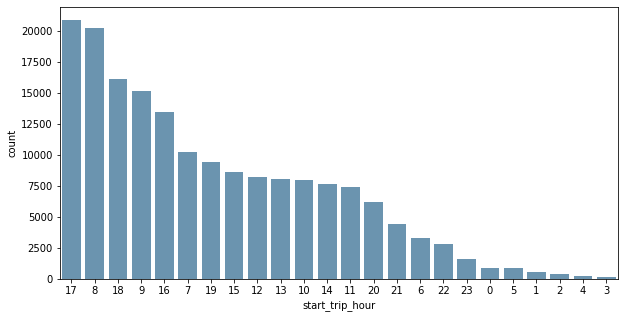

In [ ]:
plt.figure(figsize=(10,5))
sb.countplot(data=df,x='start_trip_hour',palette=['#6096ba'],order=df['start_trip_hour'].value_counts().index)
plt.show()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - yes at the age, I need to remove the outliers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> -Removing the outliers from the age will prevent the mean from getting affected by an outlier
> 

## Bivariate Exploration


### User Types Vs week days
>- the counts of trips for the customer are almost the same at each day except at the end of the week it incresed
>the counts of trips for the subscriber decrease at the beginning of the week

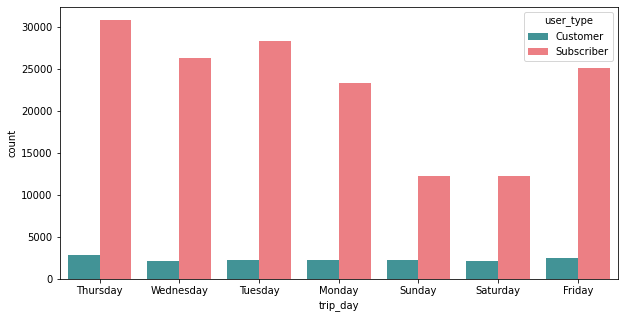

In [ ]:
plt.figure(figsize=(10,5))
sb.countplot(data = df, x = 'trip_day', hue = 'user_type',palette=[ '#34a0a4', '#fe6d73'])
plt.show()

### Duration Vs Age
> - when the age increase, the duration_hour decrease
> - when the user is younger, the duration_hour increase

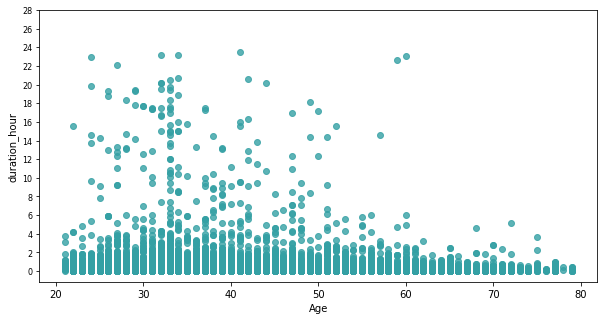

In [ ]:
plt.figure(figsize=(10,5))
sb.regplot(data=df,x='Age',y='duration_hour',fit_reg=False,scatter_kws={"color": '#34a0a4'})
plt.yticks(np.arange(0,30,2),size=8)
plt.show()

### user type VS day hours
> - The most rides are in 8 am and 17 pm.

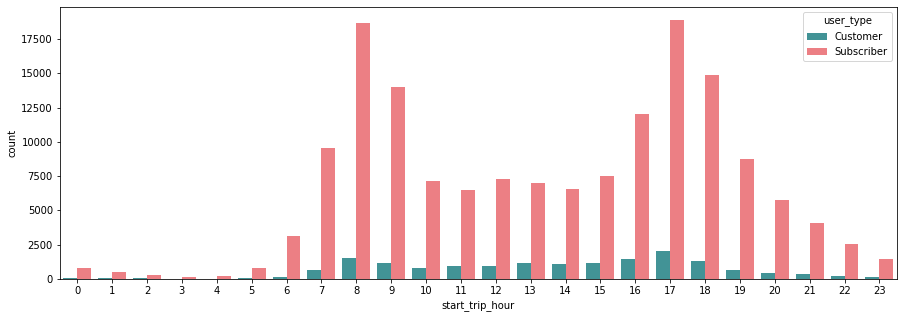

In [ ]:
plt.figure(figsize=(15,5))
sb.countplot(data = df,x='start_trip_hour',hue='user_type',palette=[ '#34a0a4', '#fe6d73'])
plt.show()

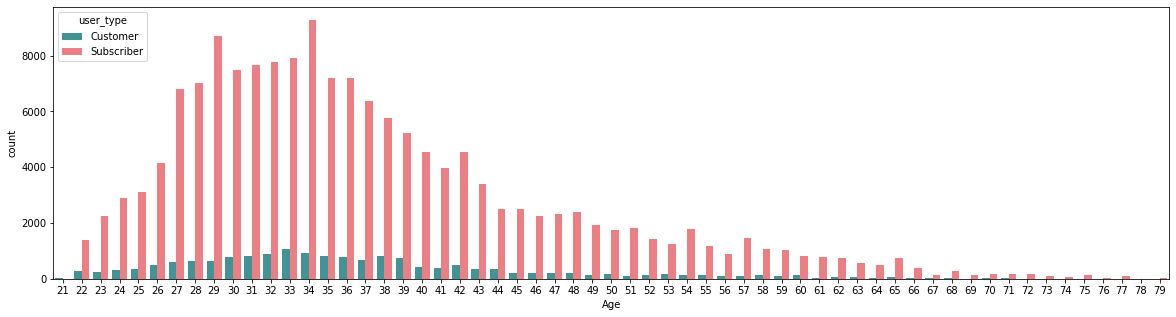

In [ ]:
plt.figure(figsize=(20,5))
sb.countplot(data = df, x = 'Age', hue = 'user_type',palette=[ '#34a0a4', '#fe6d73'])
plt.show()

Duration-gender

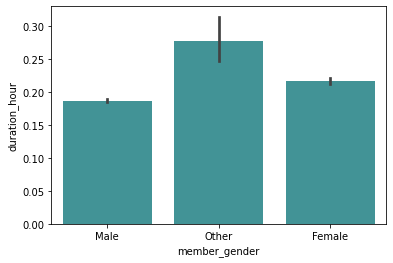

In [ ]:
sb.barplot(data = df, x = 'member_gender', y = 'duration_hour',palette=['#34a0a4'])
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


*  there is a relation between the age and the duration, when the user is younger, the duration_hour increase
*   The most rides are in 8 am and 17 pm
*  Most rides are at the end of the week(Thursday-Tuesday)
*  Most of the users of Ford GoBike System are Subscriber

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> 
*   the duration that the male take is less than the female



